In [47]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dropout
from keras.layers import Dense, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import matplotlib as plt
get_ipython().magic(u'matplotlib inline')

import datetime as dt, itertools, pandas as pd, matplotlib.pyplot as plt, numpy as np


C:\Users\mansi\AppData\Local\Temp\ipykernel_8232\1693873343.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


In [2]:
def split_sequence(sequence, n_steps=7, lookahead=0):
    X, y = list(), list()
    for i in range(lookahead,len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i-lookahead:end_ix-lookahead], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Data preprocessing

In [3]:
tsdataframe = pd.read_csv(r"./timeseries_lab3.csv")
tsdataframe

,Date,Price
0,1/1/2006,569.865168
1,1/2/2006,593.271930
2,1/3/2006,606.471193
3,1/4/2006,576.932773
4,1/5/2006,573.812500
...,...,...
3647,12/27/2015,832.554167
3648,12/28/2015,880.513919
3649,12/29/2015,856.883910
3650,12/30/2015,888.002212


In [4]:
tsdata = np.load(r"./timeseries_lab3.npy")

In [5]:
tsdata

array([569.86516854, 593.27192983, 606.47119342, ..., 856.88391039,
       888.00221239, 918.49879518])

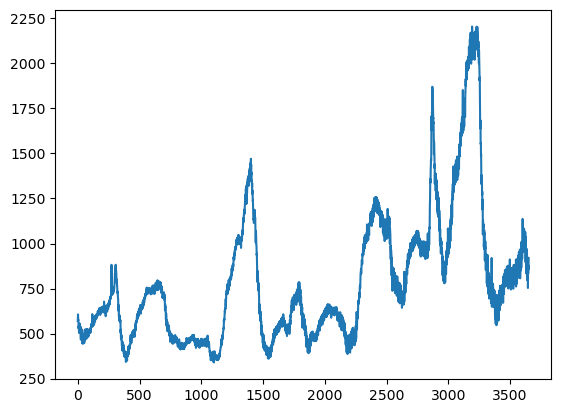

In [6]:
plt.plot(tsdata)

In [7]:
n_steps=7
n_features = 1
train_size = 2557

In [8]:
X, y = split_sequence(tsdata,n_steps)

In [9]:
X

array([[569.86516854, 593.27192983, 606.47119342, ..., 573.8125    ,
        576.17699115, 548.16748768],
       [593.27192983, 606.47119342, 576.93277311, ..., 576.17699115,
        548.16748768, 528.13043478],
       [606.47119342, 576.93277311, 573.8125    , ..., 548.16748768,
        528.13043478, 543.19517544],
       ...,
       [876.92110454, 923.34583333, 807.89142857, ..., 865.42385787,
        832.55416667, 880.51391863],
       [923.34583333, 807.89142857, 753.03703704, ..., 832.55416667,
        880.51391863, 856.88391039],
       [807.89142857, 753.03703704, 865.42385787, ..., 880.51391863,
        856.88391039, 888.00221239]])

In [10]:
#tsdata[:15]

In [11]:
#X[:10]

In [12]:
#y[:4]

In [13]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
trainX = X[:train_size]
trainy = y[:train_size]
testX = X[train_size:]
testy = y[train_size:]

In [14]:
#trainX

### LSTM model for time series prediction

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20
80/80 [==============================] - 1s 2ms/step - loss: 122333.1875
Epoch 2/20
80/80 [==============================] - 0s 2ms/step - loss: 695.1301
Epoch 3/20
80/80 [==============================] - 0s 2ms/step - loss: 644.9467
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 646.2017
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 659.4984
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 758.4860
Epoch 7/20
80/80 [==============================] - 0s 2ms/step - loss: 687.5530
Epoch 8/20
80/80 [==============================] - 0s 2ms/step - loss: 673.8653
Epoch 9/20
80/80 [==============================] - 0s 2ms/step - loss: 675.1886
Epoch 10/20
80/80 [==============================] - 0s 2ms/step - loss: 680.3203
Epoch 11/20
80/80 [==============================] - 0s 2ms/step - loss: 705.3218
Epoch 12/20
80/80 [==============================] - 0s 2ms/step - loss: 701.6390
Epoch 13/20
80/80 [===

### Prediction (test set)

In [17]:
yhat = model.predict(testX, verbose=0)

In [18]:
pred = []
for i in range(yhat.shape[0]):
    pred.append(yhat[i])
pred = np.array(pred)

Text(0.5, 0, 'Days')

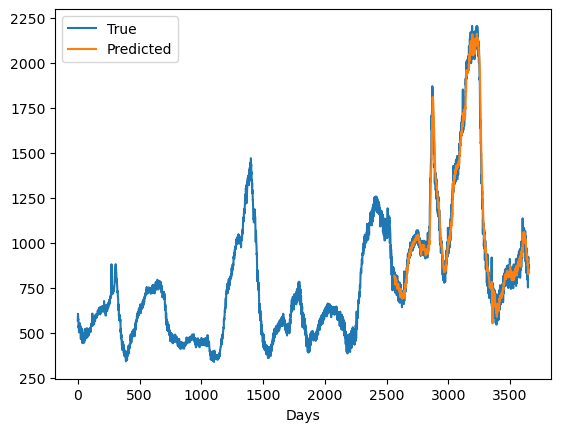

In [19]:
plt.plot(range(len(tsdata)),tsdata,label='True')
plt.plot(range(len(tsdata)-len(testy),len(tsdata)),pred,label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Days')



## Lab 4: Language Model

<b>Problem statement:</b> Use the following dataset containing element names to train a language model. Generate new names using the trained model. The generated names should resemble element names, e.g. ends with '-ium'

### Data

In [20]:
data = open(r"./elements.txt", 'r').read()
data= data.lower()
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)


In [21]:
data

'hydrogen\nhelium\nlithium\nberyllium\nboron\ncarbon\nnitrogen\noxygen\nfluorine\nneon\nsodium\nmagnesium\naluminium\nsilicon\nphosphorus\nsulfur\nchlorine\nargon\npotassium\ncalcium\nscandium\ntitanium\nvanadium\nchromium\nmanganese\niron\ncobalt\nnickel\ncopper\nzinc\ngallium\ngermanium\narsenic\nselenium\nbromine\nkrypton\nrubidium\nstrontium\nyttrium\nzirconium\nniobium\nmolybdenum\ntechnetium\nruthenium\nrhodium\npalladium\nsilver\ncadmium\nindium\ntin\nantimony\ntellurium\niodine\nxenon\ncesium\nbarium\nlanthanum\ncerium\npraseodymium\nneodymium\npromethium\nsamarium\neuropium\ngadolinium\nterbium\ndysprosium\nholmium\nerbium\nthulium\nytterbium\nlutetium\nhafnium\ntantalum\ntungsten\nrhenium\nosmium\niridium\nplatinum\ngold\nmercury\nthallium\nlead\nbismuth\npolonium\nastatine\nradon\nfrancium\nradium\nactinium\nthorium\nprotactinium\nuranium\nneptunium\nplutonium\namericium\ncurium\nberkelium\ncalifornium\neinsteinium\nfermium\nmendelevium\nnobelium\nlawrencium\nrutherfordium\n

### Model Architecture

<img src="rnn_langmod.png" style="width:500;height:300px;">

In [68]:
# Convert characters to integers
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}
data = [char_to_int[c] for c in ''.join(data)]

seq_length = 40
sequences = []
for i in range(len(data) - seq_length):
    sequences.append(data[i:i + seq_length])

X = np.array(sequences)
y = tf.keras.utils.to_categorical(X[:, -1], num_classes=len(chars))
X = X[:, :-1]

In [69]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(chars), output_dim=128, input_length=seq_length - 1),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [79]:
# Training
model.fit(X, y, epochs=150, verbose=1)

Epoch 1/150


32/32 [==============================] - 3s 78ms/step - loss: 0.1536
Epoch 2/150
32/32 [==============================] - 2s 74ms/step - loss: 0.1003
Epoch 3/150
32/32 [==============================] - 3s 83ms/step - loss: 0.1198
Epoch 4/150
32/32 [==============================] - 2s 75ms/step - loss: 0.1253
Epoch 5/150
32/32 [==============================] - 2s 76ms/step - loss: 0.1174
Epoch 6/150
32/32 [==============================] - 3s 80ms/step - loss: 0.1231
Epoch 7/150
32/32 [==============================] - 2s 78ms/step - loss: 0.1245
Epoch 8/150
32/32 [==============================] - 3s 79ms/step - loss: 0.1508
Epoch 9/150
32/32 [==============================] - 2s 76ms/step - loss: 0.1299
Epoch 10/150
32/32 [==============================] - 2s 76ms/step - loss: 0.1281
Epoch 11/150
32/32 [==============================] - 3s 82ms/step - loss: 0.1284
Epoch 12/150
32/32 [==============================] - 3s 79ms/step - loss: 0.1290
Epoch 13/150
32/32 [=================

In [120]:
# Generating names
generated_words = []
while len(generated_words) < 10:
    start = np.random.randint(0, len(data) - seq_length)
    seq = data[start:start + seq_length - 1]
    generated_text = ''.join([int_to_char[i] for i in seq])

    for _ in range(20):
        x = np.array([seq])
        y_pred = model.predict(x)[0]
        next_char = int_to_char[np.argmax(y_pred)]
        generated_text += next_char
        seq = seq[1:] + [char_to_int[next_char]]

        if generated_text.endswith('ium'):
            generated_words.append(generated_text)
            break

1/1 [==============================] - 0s 17ms/step


In [125]:
# Print the generated element names
print("Generated Element Names:")
for name in generated_words:
    print(name)

Generated Element Names:
rutherfordium
dubnium
seaborgium
bohrium
m
thorium
protactinium
uranium
neptunium
imony
tellurium
iodine
xenon
cesium
barium
latinum
gold
mercury
thallium
lead
bismuth
polonium
m
gold
mercury
thallium
lead
bismuth
polonium
urium
berkelium
californium
einsteinium
fermium
phosphorus
sulfur
chlorine
argon
potassium
lium
lead
bismuth
polonium
astatine
radon
francium
ornium
einsteinium
fermium
mendelevium
nobelium
ury
thallium
lead
bismuth
polonium
astatine
radon
francium
